# Lichess Statistiken Weisse Dame

In [4]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

website_url = 'https://rochadeeuropa.de/lichess-turniere-beendet/'
response = requests.get(website_url)
soup = BeautifulSoup(response.text)
tables = soup.find_all('table')
table = soup.find(id='tablepress-3')
lst = []
for i in table.find_all('tr'):
    string = i.text
    lst.append(string.split('\n'))
    
lst

df = pd.DataFrame(lst[2:6000])

df.loc[:,'Datum'] = df[1].str[:6]
df.loc[:,'Turnier'] = df[1].str[6:26]
df.loc[:,'Bedenkzeit'] = df[1].str[-42:-39]
df.loc[:,'Bedenkzeit'] = df[1].str[-42:-39]
df.loc[:,'Turnierlink'] = df[1].str[-39:]
df.drop([0, 1, 2], axis = 1, inplace=True)

df


,Datum,Turnier,Bedenkzeit,Turnierlink
0,26.06.,244. Lichess-Bundesl,3+2,https://lichess.org/tournament/qLURKy44
1,26.06.,244. Lichess-Bundesl,3+2,https://lichess.org/tournament/LKviAZp2
2,26.06.,244. Lichess-Liga 3A,3+2,https://lichess.org/tournament/P4TnTnTn
3,26.06.,244. Lichess-Liga 3B,3+2,https://lichess.org/tournament/TZ2r6ajF
4,26.06.,244. Lichess-Liga 3C,3+2,https://lichess.org/tournament/atSSksoX
...,...,...,...,...
5486,17.03.,3. DE-Quarantäne Tea,3+0,https://lichess.org/tournament/zzJnYBAV
5487,16.03.,2. DE-Quarantäne Tea,5+0,https://lichess.org/tournament/PC3e6MXh
5488,15.03.,1. DE-Quarantäne Tea,5+0,https://lichess.org/tournament/AKX9Yvzd
5489,14.03.,Bayrische Quarantäne,5+0,https://lichess.org/tournament/QTtwcCvA


In [ ]:
!pip install SciencePlots

In [5]:

import pandas as pd

text_file = open('akt_df_WeDa.txt', "r")
filename = text_file.read()
text_file.close()
df_Weda_Qliga = pd.read_csv(filename)

# get Nr. of already identified tournaments 
saved_t = df_Weda_Qliga.loc[0,'Turnier'][:3]
saved_t

'242'

## Finde Tournament mit Weisse Dame 

In [6]:
import requests

import pandas as pd

url = 'https://lichess.org/api/tournament/'


mask=[]

print(df.shape[0])
for row in range(df.shape[0]):
    try:
        response = requests.get(url + df.iloc[row, 3][-8:])
        response_dict = response.json()
        clubs=[]
        if 'teamStanding' in response_dict:
            length= len(response_dict['teamStanding'])
            for j in range(len(response_dict['teamStanding'])):
                 clubs.append(response_dict['teamStanding'][j]['id'])  
            if 'sc-weisse-dame-ev' in clubs :
                if df.iloc[row, 1][:3] > saved_t:
                    mask.append(True)
                    print(df.iloc[row,0], df.iloc[row, 1],df.iloc[row, 3])
                else:
                    break
            else:
                mask.append(False)
        else:
            mask.append(False)
    except:
        mask.append(False)
        print('Read Error - tournament')
        pass

# with statement stream die Daten rausziehen

5491
26.06. 244. Lichess-Liga 5B https://lichess.org/tournament/WdXA1odL
23.06. 243. Lichess-Liga 6A https://lichess.org/tournament/yziV9FMP


## Maskieren und Daten als csv-Datei speichern

In [7]:
df_Weda_Qliga = df.loc[:len(mask)-1,:].loc[mask,:]
filename = 'df_Weda_Qliga_update.csv'
df_Weda_Qliga.to_csv(filename, index=False)

df_Weda_Qliga

,Datum,Turnier,Bedenkzeit,Turnierlink
9,26.06.,244. Lichess-Liga 5B,3+2,https://lichess.org/tournament/WdXA1odL
56,23.06.,243. Lichess-Liga 6A,3+0,https://lichess.org/tournament/yziV9FMP


## Update alte Daten

In [8]:
from datetime import datetime

# get actual date for naming file
date_time = datetime.now().strftime("%Y_%m_%d")


update_file = 'df_Weda_Qliga_update.csv'

text_file = open('akt_df_WeDa.txt', "r")
old_file = text_file.read()

df_Weda_Qliga_alt = pd.read_csv(old_file)
df_Weda_Qliga = pd.read_csv(update_file)


df_Weda_Qliga = pd.concat([df_Weda_Qliga, df_Weda_Qliga_alt], axis=0)
df_Weda_Qliga.to_csv('df_WeDa_QLiga_' + date_time +'.csv', index=False)

text_file = open('akt_df_WeDa.txt', "w")
text_file.write('df_WeDa_QLiga_' + date_time +'.csv')
text_file.close()

df_Weda_Qliga 

,Datum,Turnier,Bedenkzeit,Turnierlink
0,26.06.,244. Lichess-Liga 5B,3+2,https://lichess.org/tournament/WdXA1odL
1,23.06.,243. Lichess-Liga 6A,3+0,https://lichess.org/tournament/yziV9FMP
0,19.06.,242. Lichess-Liga 7A,5+0,https://lichess.org/tournament/wy14MmQ7
1,16.06.,241. Lichess-Liga 8A,3+2,https://lichess.org/tournament/9TYvxbmC
2,12.06.,240. Lichess-Liga 7C,3+0,https://lichess.org/tournament/JkdQFyX7
...,...,...,...,...
229,19.04.,19. Quarantäne-Liga 4C,3+2,https://lichess.org/tournament/q2d5O41c
230,16.04.,18. Quarantäne-Liga 3C,3+0,https://lichess.org/tournament/bujFyFLL
231,12.04.,17. Quarantäne-Liga 4C,5+0,https://lichess.org/tournament/vdoW0msA
232,09.04.,16. Quarantäne-Liga 4C,3+0,https://lichess.org/tournament/n8syRF27


## Laden der csv-Datei

In [9]:
import pandas as pd

text_file = open('akt_df_WeDa.txt', "r")
filename = text_file.read()
df_Weda_Qliga = pd.read_csv(filename)


df_Weda_Qliga

,Datum,Turnier,Bedenkzeit,Turnierlink
0,26.06.,244. Lichess-Liga 5B,3+2,https://lichess.org/tournament/WdXA1odL
1,23.06.,243. Lichess-Liga 6A,3+0,https://lichess.org/tournament/yziV9FMP
2,19.06.,242. Lichess-Liga 7A,5+0,https://lichess.org/tournament/wy14MmQ7
3,16.06.,241. Lichess-Liga 8A,3+2,https://lichess.org/tournament/9TYvxbmC
4,12.06.,240. Lichess-Liga 7C,3+0,https://lichess.org/tournament/JkdQFyX7
...,...,...,...,...
231,19.04.,19. Quarantäne-Liga 4C,3+2,https://lichess.org/tournament/q2d5O41c
232,16.04.,18. Quarantäne-Liga 3C,3+0,https://lichess.org/tournament/bujFyFLL
233,12.04.,17. Quarantäne-Liga 4C,5+0,https://lichess.org/tournament/vdoW0msA
234,09.04.,16. Quarantäne-Liga 4C,3+0,https://lichess.org/tournament/n8syRF27


## Jahreszahlen hinzufügen

In [10]:
df_Weda_Qliga['Jahr'] = ''


for row in range (df_Weda_Qliga.shape[0]):
    try:
        if int(df_Weda_Qliga.loc[row,'Turnier'][0:df_Weda_Qliga.loc[row,'Turnier'].find('.')]) >= 194:
            df_Weda_Qliga.loc[row,'Jahr'] = 2022
        elif int(df_Weda_Qliga.loc[row,'Turnier'][0:df_Weda_Qliga.loc[row,'Turnier'].find('.')]) >= 90:
            df_Weda_Qliga.loc[row,'Jahr'] = 2021
        elif int(df_Weda_Qliga.loc[row,'Turnier'][0:df_Weda_Qliga.loc[row,'Turnier'].find('.')]) < 90:
            df_Weda_Qliga.loc[row,'Jahr'] = 2020
    except:
        pass
    
df_Weda_Qliga

,Datum,Turnier,Bedenkzeit,Turnierlink,Jahr
0,26.06.,244. Lichess-Liga 5B,3+2,https://lichess.org/tournament/WdXA1odL,2022
1,23.06.,243. Lichess-Liga 6A,3+0,https://lichess.org/tournament/yziV9FMP,2022
2,19.06.,242. Lichess-Liga 7A,5+0,https://lichess.org/tournament/wy14MmQ7,2022
3,16.06.,241. Lichess-Liga 8A,3+2,https://lichess.org/tournament/9TYvxbmC,2022
4,12.06.,240. Lichess-Liga 7C,3+0,https://lichess.org/tournament/JkdQFyX7,2022
...,...,...,...,...,...
231,19.04.,19. Quarantäne-Liga 4C,3+2,https://lichess.org/tournament/q2d5O41c,2020
232,16.04.,18. Quarantäne-Liga 3C,3+0,https://lichess.org/tournament/bujFyFLL,2020
233,12.04.,17. Quarantäne-Liga 4C,5+0,https://lichess.org/tournament/vdoW0msA,2020
234,09.04.,16. Quarantäne-Liga 4C,3+0,https://lichess.org/tournament/n8syRF27,2020


## Not-counted Turniere Rausschmeißen

In [11]:
mask =[]

mask = df_Weda_Qliga['Turnier'].str[0].str.isnumeric()
df_Weda_Qliga = df_Weda_Qliga.loc[mask,:].reset_index(drop = True)       
df_Weda_Qliga

,Datum,Turnier,Bedenkzeit,Turnierlink,Jahr
0,26.06.,244. Lichess-Liga 5B,3+2,https://lichess.org/tournament/WdXA1odL,2022
1,23.06.,243. Lichess-Liga 6A,3+0,https://lichess.org/tournament/yziV9FMP,2022
2,19.06.,242. Lichess-Liga 7A,5+0,https://lichess.org/tournament/wy14MmQ7,2022
3,16.06.,241. Lichess-Liga 8A,3+2,https://lichess.org/tournament/9TYvxbmC,2022
4,12.06.,240. Lichess-Liga 7C,3+0,https://lichess.org/tournament/JkdQFyX7,2022
...,...,...,...,...,...
230,19.04.,19. Quarantäne-Liga 4C,3+2,https://lichess.org/tournament/q2d5O41c,2020
231,16.04.,18. Quarantäne-Liga 3C,3+0,https://lichess.org/tournament/bujFyFLL,2020
232,12.04.,17. Quarantäne-Liga 4C,5+0,https://lichess.org/tournament/vdoW0msA,2020
233,09.04.,16. Quarantäne-Liga 4C,3+0,https://lichess.org/tournament/n8syRF27,2020


## Turnierdaten speichern: NJSON Reponse in .json umwandeln und speichern

In [12]:
import json
import requests
from os.path import exists


url = 'https://lichess.org/api/tournament/'

for row in range (df_Weda_Qliga.shape[0]):
 
    response = requests.get(url + df_Weda_Qliga.iloc[row, 3][-8:]+'/results')
    list_resp = response.text.splitlines()
    json_resp = list(map(lambda x: json.loads(x), list_resp))
    
    filepath = 'data\\'+ df_Weda_Qliga.iloc[row, 1][:df_Weda_Qliga.iloc[row, 1].find('.')]  +'.json'
    if not exists(filepath): 
        with open(filepath, 'w') as f:
            json.dump(json_resp, f)
    else:
        break


## Auswertung der Turnierdaten

In [13]:
import ast
import pandas as pd


df_Weda_Qliga['Ergebnisse_Spieler'] = ''
df_Weda_Qliga['Anzahl_Spieler'] = ''


# creates List with actual players and score values

for row in range(df_Weda_Qliga.shape[0]):
        list_players=[[],[]]
        
        filepath = 'data\\'+ df_Weda_Qliga.iloc[row, 1][:df_Weda_Qliga.iloc[row, 1].find('.')]  +'.json'
        with open(filepath) as f:
            list_T= json.load(f)


        for k in range(len(list_T)):
            if 'sc-weisse-dame-ev' == list_T[k]['team']:
                list_players[0].append(list_T[k]['username'])
                list_players[1].append(list_T[k]['score'])
        df_Weda_Qliga.loc[row,'Ergebnisse_Spieler'] = str(list_players)   
        df_Weda_Qliga.loc[row,'Anzahl_Spieler'] = len(list_players[0])  
        
df_Weda_Qliga



,Datum,Turnier,Bedenkzeit,Turnierlink,Jahr,Ergebnisse_Spieler,Anzahl_Spieler
0,26.06.,244. Lichess-Liga 5B,3+2,https://lichess.org/tournament/WdXA1odL,2022,"[['Fighter89', 'Belisar603', 'Kevin_Hoegy', 'F...",11
1,23.06.,243. Lichess-Liga 6A,3+0,https://lichess.org/tournament/yziV9FMP,2022,"[['Fighter89', 'Belisar603', 'jka', 'Kevin_Hoe...",10
2,19.06.,242. Lichess-Liga 7A,5+0,https://lichess.org/tournament/wy14MmQ7,2022,"[['Belisar603', 'tigranrules', 'DieDameIstWeg'...",11
3,16.06.,241. Lichess-Liga 8A,3+2,https://lichess.org/tournament/9TYvxbmC,2022,"[['Belisar603', 'DieDameIstWeg', 'jka', 'Chris...",13
4,12.06.,240. Lichess-Liga 7C,3+0,https://lichess.org/tournament/JkdQFyX7,2022,"[['jka', 'WeDaChris', 'Flitze', 'ChristophBars...",10
...,...,...,...,...,...,...,...
230,19.04.,19. Quarantäne-Liga 4C,3+2,https://lichess.org/tournament/q2d5O41c,2020,"[['jka', 'DieDameIstWeg', 'WeDaChris', 'Taktik...",25
231,16.04.,18. Quarantäne-Liga 3C,3+0,https://lichess.org/tournament/bujFyFLL,2020,"[['yantares', 'Belisar603', 'jka', 'NamTham', ...",25
232,12.04.,17. Quarantäne-Liga 4C,5+0,https://lichess.org/tournament/vdoW0msA,2020,"[['Belisar603', 'jka', 'DieDameIstWeg', 'yanta...",19
233,09.04.,16. Quarantäne-Liga 4C,3+0,https://lichess.org/tournament/n8syRF27,2020,"[['DieDameIstWeg', 'CccLllZzz', 'Flitze', 'Bel...",19


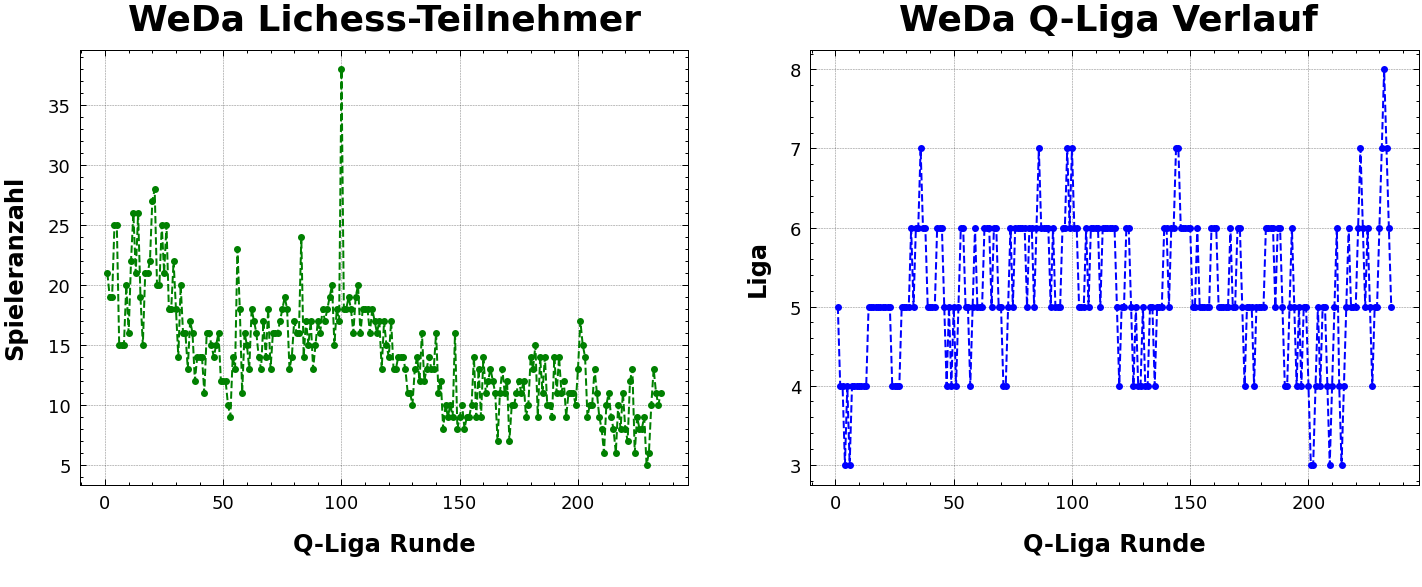

In [83]:
Liga_change = (df_Weda_Qliga[::-1].loc[:,'Turnier'].str[-2])
Liga_change[Liga_change == 's'] = 4
Liga_change = Liga_change.astype(int)
Liga_change = Liga_change.reset_index().drop('index', axis=1)
Liga_change.index += 1 

import matplotlib.pyplot as plt

plt.style.use(['science','notebook','grid'])
fig,ax = plt.subplots(1,2, figsize=(24,8))


#settings fontsize fs and lablepad lp
fs = 24
lp = 20
# First Plot
ax[0].plot(range(1,1+len(df_Weda_Qliga)), df_Weda_Qliga[::-1].loc[:,'Anzahl_Spieler'],'o--',color='g',ms=7)
ax[0].set_title(label='WeDa Lichess-Teilnehmer', fontsize = 36, pad=lp, fontweight="bold")
ax[0].set_ylabel('Spieleranzahl', fontsize = fs, labelpad=lp,fontweight="bold")
ax[0].set_xlabel('Q-Liga Runde\n', fontsize = fs, labelpad=lp, fontweight="bold")
ax[0].tick_params(axis='both', which='major', labelsize=18)
ax[0].locator_params(axis='y', nbins=10)

#Second PLot
ax[1].plot(Liga_change,'o--',color='b',ms=7)
ax[1].set_title(label='WeDa Q-Liga Verlauf ', fontsize = 36, pad=lp,fontweight="bold")
ax[1].set_ylabel('Liga', fontsize = fs, labelpad=lp, fontweight="bold")
ax[1].set_xlabel('Q-Liga Runde', fontsize = fs, labelpad=lp, fontweight="bold")
ax[1].locator_params(axis='y', nbins=6)
ax[1].tick_params(axis='both', which='major', labelsize=18)






## Turnierdatenauswertung

In [42]:
import pandas as pd
import numpy as np

lst_players=[]

for row in range(df_Weda_Qliga.shape[0]):
    
        list_T = ast.literal_eval(df_Weda_Qliga.loc[row,'Ergebnisse_Spieler'])   
        for j in range(len(list_T[0])):
            lst_players.append(list_T[0][j])
             
set_players = set(lst_players)
df_Spieler = pd.DataFrame(columns= ['1.Platz','2.Platz','3.Platz','Teilnahmen','Gesamtscore'],
                          index=set_players)
df_Spieler = df_Spieler.fillna(0)
df_Spieler

#bestimmt die Teilnahmen
for name in set_players:
    df_Spieler.loc[name,'Teilnahmen'] = str(lst_players.count(name))
    
#bestimmt die Teilnahmen    
for row in range(df_Weda_Qliga.shape[0]):
    list_T = ast.literal_eval(df_Weda_Qliga.loc[row,'Ergebnisse_Spieler'])   
    for name in set_players:
        
        ## Zählen von 1,2 und 3.Platz
        if name in list_T[0]:
            idx_name = list_T[0].index(name)
            
            if idx_name < 3:
                    df_Spieler.loc[name,df_Spieler.columns[list_T[0].index(name)]] =\
                    df_Spieler.loc[name,df_Spieler.columns[list_T[0].index(name)]]+1
            
        ## Zählen Gesamtscore
            df_Spieler.loc[name,'Gesamtscore'] += list_T[1][idx_name]
   
df_Spieler = df_Spieler.sort_values(['Gesamtscore'], ascending=False)            

df_Spieler = df_Spieler.rename(columns = {'Teilnahmen':'Teilnahmen'+'('+str(df_Weda_Qliga.shape[0])+')'}) 
writer = pd.ExcelWriter('Lichess_Statistik.xlsx', engine = 'xlsxwriter')
df_Spieler.to_excel(writer, sheet_name = 'Gesamtstatistik')


                                

df_Spieler.head(10)

,1.Platz,2.Platz,3.Platz,Teilnahmen(235),Gesamtscore
jka,58,45,31,215,6000
Belisar603,66,48,28,210,5870
DieDameIstWeg,16,20,31,232,4851
WeDaChris,1,13,21,232,4410
Flitze,6,13,25,200,3981
MrXY71,13,14,23,176,3930
Kevin_Hoegy,46,29,19,137,3697
SpeedyGonzalesWD,0,2,6,160,2925
tigranrules,5,12,11,100,1850
yantares,10,14,8,67,1738


In [57]:

lst_years=[2020,2021,2022]


for i in lst_years:
    lst_players=[]
    mask = df_Weda_Qliga.loc[:,'Jahr'] == i
    df_Weda_Qliga_year = df_Weda_Qliga.loc[mask,:].reset_index()


    for row in range(df_Weda_Qliga_year.shape[0]):
        
            list_T = ast.literal_eval(df_Weda_Qliga_year.loc[row,'Ergebnisse_Spieler'])   
            for j in range(len(list_T[0])):
                lst_players.append(list_T[0][j])
                 
    set_players = set(lst_players)
    df_Spieler = pd.DataFrame(columns= ['1.Platz','2.Platz','3.Platz','Teilnahmen','Gesamtscore'],
                              index=set_players)
    df_Spieler = df_Spieler.fillna(0)
    df_Spieler
    
    #bestimmt die Teilnahmen
    for name in set_players:
        df_Spieler.loc[name,'Teilnahmen'] = str(lst_players.count(name))
        
    #bestimmt die Teilnahmen    
    for row in range(df_Weda_Qliga_year.shape[0]):
        list_T = ast.literal_eval(df_Weda_Qliga_year.loc[row,'Ergebnisse_Spieler'])   
        for name in set_players:
            
            ## Zählen von 1,2 und 3.Platz
            if name in list_T[0]:
                idx_name = list_T[0].index(name)
                
                if idx_name < 3:
                        df_Spieler.loc[name,df_Spieler.columns[list_T[0].index(name)]] =\
                        df_Spieler.loc[name,df_Spieler.columns[list_T[0].index(name)]]+1
                
            ## Zählen Gesamtscore
                df_Spieler.loc[name,'Gesamtscore'] += list_T[1][idx_name]
      
    df_Spieler = df_Spieler.sort_values(['Gesamtscore'], ascending=False)
    df_Spieler = df_Spieler.rename(columns = {'Teilnahmen':'Teilnahmen'+'('+str(df_Weda_Qliga_year.shape[0])+')'}) 
    display(df_Spieler.head(10))                    
    df_Spieler.to_excel(writer, sheet_name=str(i))

    



,1.Platz,2.Platz,3.Platz,Teilnahmen(75),Gesamtscore
Belisar603,31,16,8,74,2349
jka,17,16,14,71,2148
DieDameIstWeg,4,6,10,75,1808
MrXY71,4,6,12,62,1554
WeDaChris,0,4,1,73,1517
Flitze,3,2,7,61,1400
SpeedyGonzalesWD,0,1,3,66,1345
Kevin_Hoegy,10,6,3,23,724
Leeward1947,0,0,1,47,690
Taktikai,0,1,0,33,679


,1.Platz,2.Platz,3.Platz,Teilnahmen(104),Gesamtscore
jka,29,21,10,98,2605
Belisar603,26,21,12,89,2354
DieDameIstWeg,7,9,14,103,1986
WeDaChris,1,4,13,104,1897
Kevin_Hoegy,24,15,10,74,1795
MrXY71,5,6,8,87,1779
Flitze,0,6,9,88,1563
SpeedyGonzalesWD,0,0,2,73,1199
Bhuvi06,0,0,2,92,1040
tigranrules,4,6,4,53,955


,1.Platz,2.Platz,3.Platz,Teilnahmen(56),Gesamtscore
jka,12,8,7,46,1247
Kevin_Hoegy,12,8,6,40,1178
Belisar603,9,11,8,47,1167
DieDameIstWeg,5,5,7,54,1057
Flitze,3,5,9,51,1018
WeDaChris,0,5,7,55,996
MrXY71,4,2,3,27,597
yantares,4,2,0,19,490
tigranrules,0,5,2,24,413
SpeedyGonzalesWD,0,1,1,21,381


# Old code

## Neue Elemente manuell hinzufügen

In [28]:
    

df_Weda_Qliga.loc[-1] = ['10.04.', '222. Lichess-Liga 4A', '3+0','https://lichess.org/tournament/qglbc5J1']  # adding a row
df_Weda_Qliga.index = df_Weda_Qliga.index + 1  # shifting index
df_Weda_Qliga.sort_index(inplace=True) 

df_Weda_Qliga.loc[-1] = ['14.04.', '223. Lichess-Liga 3B', '3+2','https://lichess.org/tournament/P7zVOA3T']  # adding a row
df_Weda_Qliga.index = df_Weda_Qliga.index + 1  # shifting index
df_Weda_Qliga.sort_index(inplace=True) 

df_Weda_Qliga

ValueError: cannot set a row with mismatched columns

## Read Turnierfiles alller Lichessturnier

In [1]:
import pandas as pd
df = pd.read_csv('Liste_Lichess_Turnier.txt', sep="	")
df = df.drop(labels='TN. / Players', axis=1)
df.columns = ['Datum', 'Turnier', 'Bedenkzeit', 'Turnierlink']
df.head()

,Datum,Turnier,Bedenkzeit,Turnierlink
0,24.04.,226. Lichess-Bundesliga,3+2,https://lichess.org/tournament/6jxW0ugu
1,24.04.,226. Lichess-Bundesliga 2,3+2,https://lichess.org/tournament/17lAk6aa
2,24.04.,226. Lichess-Liga 3A,3+2,https://lichess.org/tournament/Yb8nLr0D
3,24.04.,226. Lichess-Liga 3B,3+2,https://lichess.org/tournament/87bgBgmR
4,24.04.,226. Lichess-Liga 3C,3+2,https://lichess.org/tournament/XJJG9hQf
...,...,...,...,...
9395,16.03.,2. DE-Quarantäne Teams 1-10,5+0,https://lichess.org/tournament/PC3e6MXh
9396,16.03.,2. DE-Quarantäne Teams 11-20,5+0,https://lichess.org/tournament/7qtkVnj8
9397,15.03.,1. DE-Quarantäne Team Battle,5+0,https://lichess.org/tournament/AKX9Yvzd
9398,14.03.,Bayrische Quarantäne Blitz Arena,5+0,https://lichess.org/tournament/QTtwcCvA
